In [2]:
from dreimac import LensCoords, CircleMapUtils, PlotUtils, GeometryExamples, LensMapUtils

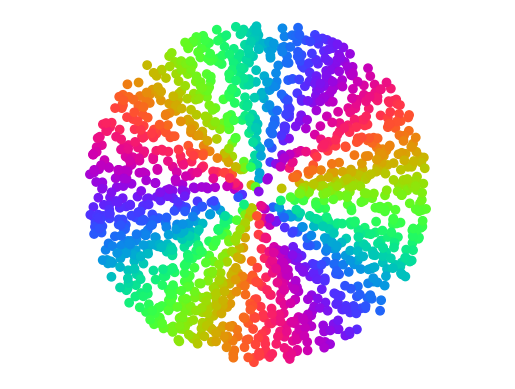

In [3]:
import numpy as np
import matplotlib.pyplot as plt

q = 3
dist_mat, X = GeometryExamples.moore_space_distance_matrix(rough_n_points=2000, prime=q)
colors = CircleMapUtils.to_sinebow(np.array([np.arctan2(*x) * q for x in X]))

plt.figure()
plt.scatter(X[:,0],X[:,1],c=colors)
_ = plt.axis("equal")
_ = plt.axis("off")

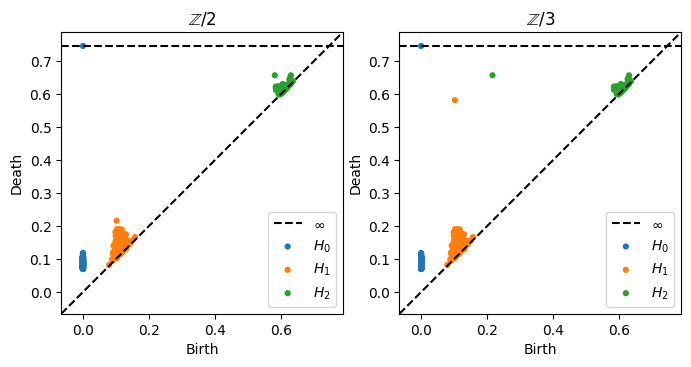

In [4]:
from ripser import ripser
from persim import plot_diagrams
plt.figure(figsize=(8, 4))
for i,prime in enumerate([2,3]):
    pd = ripser(dist_mat, coeff=prime, maxdim=2, n_perm=300, distance_matrix=True)['dgms']
    plt.subplot(1,2,i+1) ; plot_diagrams(pd) ; _ = plt.title("$\mathbb{Z}/" + str(prime) + "$")

In [5]:
lc = LensCoords(dist_mat, n_landmarks=500, distance_matrix=True)
coords = lc.get_coordinates(perc=0.99, lens_dim=2, cocycle_idx=0, projective_dim_red_mode="exponential")
coords_R3 = LensMapUtils.lens_3D_to_disk_3D(coords, 3)

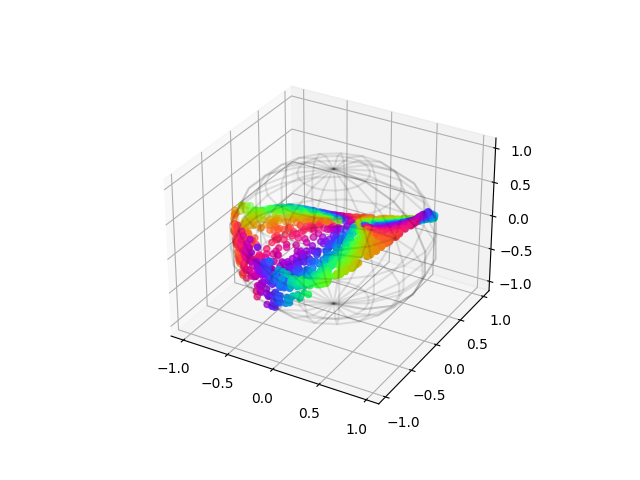

In [6]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = plt.axes(projection='3d')
PlotUtils.plot_3sphere_mesh()
_ = ax.scatter3D(coords_R3[:,0], coords_R3[:,1], coords_R3[:,2], s=20, c=colors)